In [214]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [215]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

In [216]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [217]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [218]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [219]:
train.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [220]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [221]:
train['Sex'] = train['Sex'].replace('male', 1)
train['Sex'] = train['Sex'].replace('female', 0)

In [222]:
train = pd.get_dummies(train, columns = ['Embarked'])

In [223]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1


In [224]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked_C   891 non-null    uint8  
 12  Embarked_Q   891 non-null    uint8  
 13  Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(6), object(3), uint8(3)
memory usage: 79.3+ KB


In [225]:
train = train.drop_duplicates()

In [226]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [227]:
mean_age = train['Age'].mean()
train['Age'] = train['Age'].fillna(mean_age)

In [228]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1


In [229]:
train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,0,0.742038
1,1,0.188908


In [230]:
train[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [231]:
train[['Embarked_C', 'Survived']].groupby(['Embarked_C'], as_index=False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked_C,Survived
1,1,0.553571
0,0,0.344398


In [232]:
train[['Embarked_Q', 'Survived']].groupby(['Embarked_Q'], as_index=False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked_Q,Survived
1,1,0.389610
0,0,0.383292


In [233]:
train[['Embarked_S', 'Survived']].groupby(['Embarked_S'], as_index=False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked_S,Survived
0,0,0.506073
1,1,0.336957


In [234]:
train['Title'] = train.Name.str.extract(' ([A-Za-z]+)\.', expand = False)

In [235]:
print(train['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


In [236]:
train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

In [237]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0,0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1,Mr


In [238]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked_C   891 non-null    uint8  
 12  Embarked_Q   891 non-null    uint8  
 13  Embarked_S   891 non-null    uint8  
 14  Title        891 non-null    object 
dtypes: float64(2), int64(6), object(4), uint8(3)
memory usage: 93.1+ KB


In [239]:
train = train.drop(['Ticket', 'Cabin', 'Name'], axis=1)

In [240]:
train = pd.get_dummies(train, columns = ['Title'])

In [241]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,1,22.0,1,0,7.2500,0,0,1,0,0,1,0,0
1,2,1,1,0,38.0,1,0,71.2833,1,0,0,0,0,0,1,0
2,3,1,3,0,26.0,0,0,7.9250,0,0,1,0,1,0,0,0
3,4,1,1,0,35.0,1,0,53.1000,0,0,1,0,0,0,1,0
4,5,0,3,1,35.0,0,0,8.0500,0,0,1,0,0,1,0,0


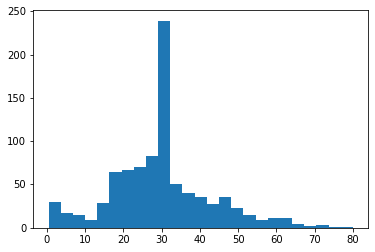

In [242]:
plt.hist(train['Age'], bins = 25)
plt.show()

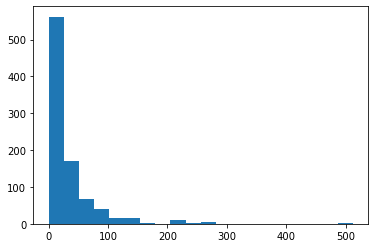

In [243]:
plt.hist(train['Fare'], bins = 20)
plt.show()

In [244]:
total_masters = train['Title_Master'].sum()
total_miss = train['Title_Miss'].sum()
total_mr = train['Title_Mr'].sum()
total_mrs = train['Title_Mrs'].sum()
total_rare = train['Title_Rare'].sum()
print('Total Masters: ', total_masters)
print('Total Miss: ', total_miss)
print('Total Mr: ', total_mr)
print('Total Mrs: ', total_mrs)
print('Total Rare: ', total_rare)

Total Masters:  40
Total Miss:  185
Total Mr:  517
Total Mrs:  126
Total Rare:  23


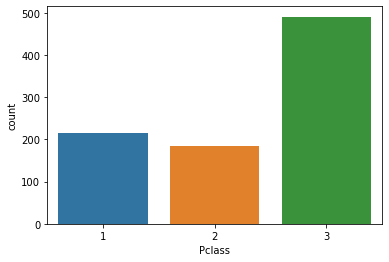

In [245]:
sns.countplot(x = 'Pclass', data = train)
plt.show()
plt.close()

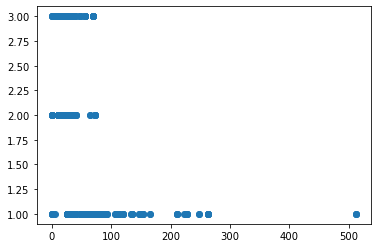

In [246]:
plt.scatter(train['Fare'], train['Pclass'])
plt.show()

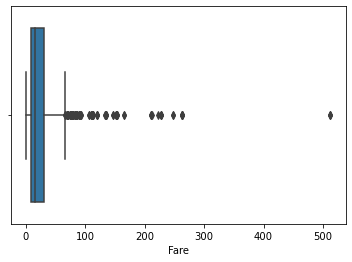

In [247]:
sns.boxplot(x = 'Fare', data=train)
plt.show()

In [248]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,1,22.0,1,0,7.2500,0,0,1,0,0,1,0,0
1,2,1,1,0,38.0,1,0,71.2833,1,0,0,0,0,0,1,0
2,3,1,3,0,26.0,0,0,7.9250,0,0,1,0,1,0,0,0
3,4,1,1,0,35.0,1,0,53.1000,0,0,1,0,0,0,1,0
4,5,0,3,1,35.0,0,0,8.0500,0,0,1,0,0,1,0,0


In [249]:
mean_age = train['Age'].mean()
std_age = train['Age'].std()
train['Age'] = (train['Age'] - mean_age)/std_age

In [250]:
mean_fare = train['Fare'].mean()
std_fare = train['Fare'].std()
train['Fare'] = (train['Fare'] - mean_fare)/std_fare

In [251]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,1,-0.592148,1,0,-0.502163,0,0,1,0,0,1,0,0
1,2,1,1,0,0.638430,1,0,0.786404,1,0,0,0,0,0,1,0
2,3,1,3,0,-0.284503,0,0,-0.488580,0,0,1,0,1,0,0,0
3,4,1,1,0,0.407697,1,0,0.420494,0,0,1,0,0,0,1,0
4,5,0,3,1,0.407697,0,0,-0.486064,0,0,1,0,0,1,0,0


In [252]:
test['Sex'] = test['Sex'].replace('male', 1)
test['Sex'] = test['Sex'].replace('female', 0)
test = pd.get_dummies(test, columns = ['Embarked'])
test = test.drop_duplicates()
test_mean_age = test['Age'].mean()
test['Age'] = test['Age'].fillna(test_mean_age)
test['Title'] = test.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
test['Title'] = test['Title'].replace(['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')
test = test.drop(['Ticket', 'Cabin', 'Name'], axis=1)
test = pd.get_dummies(test, columns = ['Title'])
test_mean_age = test['Age'].mean()
test_std_age = test['Age'].std()
test['Age'] = (test['Age'] - test_mean_age)/test_std_age
test_mean_fare = test['Fare'].mean()
test_std_fare = test['Fare'].std()
test['Fare'] = (test['Fare'] - test_mean_fare)/test_std_fare

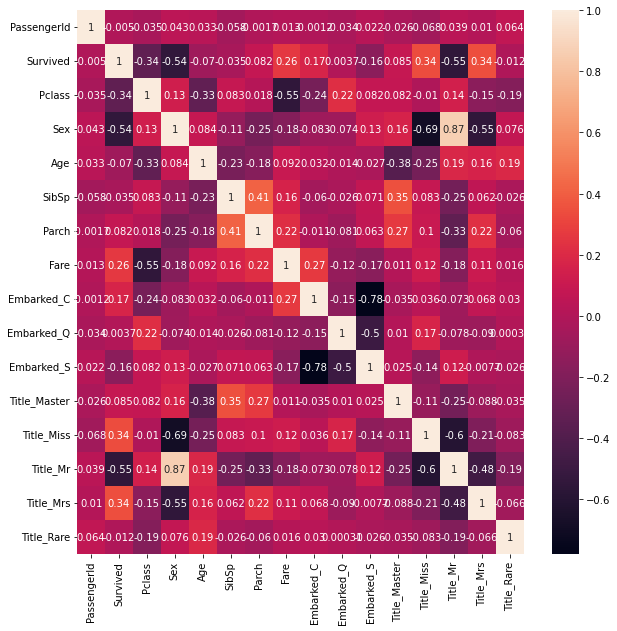

In [255]:
train_corr_matrix = train.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(train_corr_matrix, annot = True)
plt.show()

In [256]:
high_correlation_values = ['Pclass', 'Sex', 'Fare', 'Title_Miss', 'Title_Mr', 'Title_Mrs']
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,1,0,3,1,-0.592148,1,0,-0.502163,0,0,1,0,0,1,0,0
1,2,1,1,0,0.638430,1,0,0.786404,1,0,0,0,0,0,1,0
2,3,1,3,0,-0.284503,0,0,-0.488580,0,0,1,0,1,0,0,0
3,4,1,1,0,0.407697,1,0,0.420494,0,0,1,0,0,0,1,0
4,5,0,3,1,0.407697,0,0,-0.486064,0,0,1,0,0,1,0,0


In [258]:
y_train = train['Survived']
X_train = train.drop(['PassengerId', 'Survived', 'Age', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Rare'], axis = 1)
X_test = test.drop(['PassengerId', 'Age', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Rare'], axis = 1)

In [260]:
from sklearn.linear_model import LogisticRegression

In [261]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [269]:
X_test.isna().sum()
mean_fare = X_test['Fare'].mean()
X_test['Fare'] = X_test['Fare'].fillna(mean_fare)

In [270]:
prediction = model.predict(X_test)
print('test data prediction: ', prediction)

test data prediction:  [0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [281]:
acc_log = round(model.score(X_train, y_train) * 100, 2)
print(acc_log)

79.46


In [282]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [283]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

79.57

In [284]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

84.62

In [285]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

78.34

In [286]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

77.78

In [287]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

/Users/wilsonbeckman/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


78.79

In [288]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

77.67

In [289]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

91.58

In [290]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

91.58

In [291]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,91.58
8,Decision Tree,91.58
1,KNN,84.62
0,Support Vector Machines,79.57
2,Logistic Regression,79.46
7,Linear SVC,78.79
4,Naive Bayes,78.34
5,Perceptron,77.78
6,Stochastic Gradient Decent,77.67
